# Linear Regression VS Linear Neuronal Network for Regression

  En este Notebook Participare en el concurso de Kaggle ---.

## Contenido
  - Exploración de los datos
  - Solución mediante método de RSE Regresion Lineal
  - Solución mediante método Neuronal Network (NNR)
  - Solución mediante Multiple Layer Perceptron (MLP)
  -

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib as mpt

In [2]:
df = pd.read_csv('./train.csv')
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [3]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [4]:
df[:1]

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0


In [5]:
df.shape

(74111, 29)

### Price distribution

In [6]:
prices = df[['log_price']]
prices

,log_price
0,5.010635
1,5.129899
2,4.976734
3,6.620073
4,4.744932
...,...
74106,4.605170
74107,5.043425
74108,5.220356
74109,5.273000


## Histograma
Realizamos un histograma para ver la distribución de los precios.

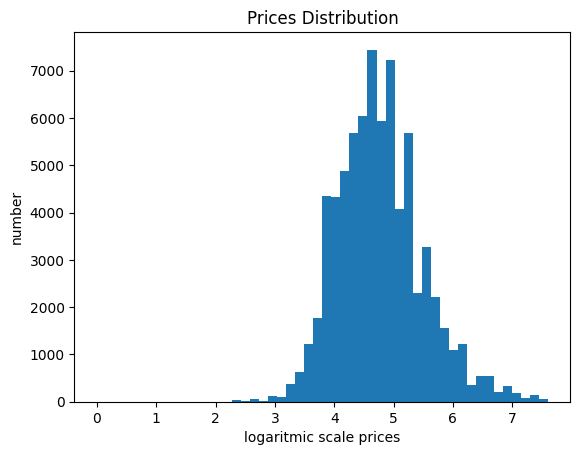

In [7]:
import matplotlib.pyplot as plt
plt.hist(prices,bins=50)
plt.title("Prices Distribution")
plt.xlabel("logaritmic scale prices")
plt.ylabel("number")
plt.show()
plt.show()

Mapeamos la latitud y longitud para preciar cual es la distribución de las casas

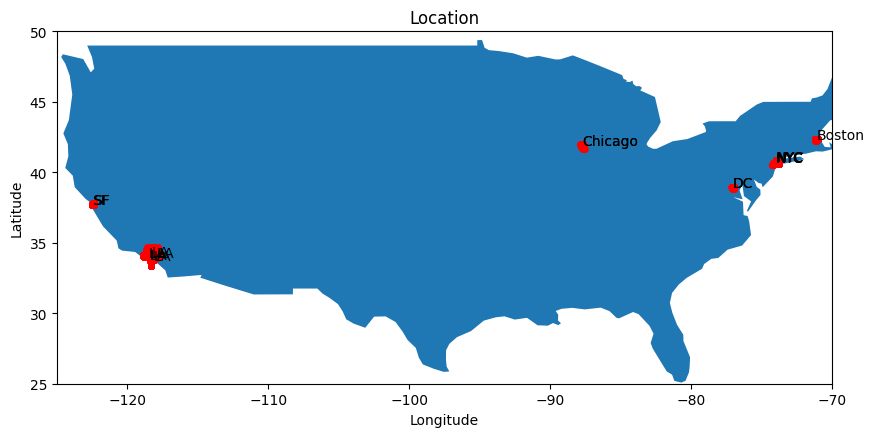

In [8]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")

fig,ax=plt.subplots(figsize=(10, 6))

geometry = [Point(xy) for xy in zip(df['longitude'],df['latitude'])]


gdf = GeoDataFrame(df, geometry=geometry)
GeoDataFrame(world.loc[4,:]).T["geometry"].plot(ax=ax)
ax.set_xlim(-125,-70)
ax.set_ylim(25,50)

gdf.plot(ax=ax, marker='o', color='red', markersize=15);

for idx, row in df[:18].iterrows():
    ax.annotate(row['city'], (row['longitude'],row['latitude']))

plt.title("Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## Feature selection

- Voy a quitar las siguientes Features:  

 |           Feature|Razón                                       |  
 |------------------|--------------------------------------------|  
 |Latitud y Longitud|Ya tenemos el nombre de la ciudad           |
 |Descripción|Al ser textos tan diferentes no es fácil de trabajar en regression|  
 |first_review|Es texto|  
 |thumbnail_url|Son URL que no tienen relación con el precio|  
 |zipcode|Es un código postal, al ya tener las ciudades no creo que sea importante|  
 |name|Son todos nombre únicos que no influencian el precio|  
 -----

In [9]:
df = df.drop(columns=['latitude', 'longitude','description','first_review','thumbnail_url', 'zipcode','name'])
df.shape

(74111, 22)

## Eliminar filas con campos NaN

Prácticamente el 40% de las filas del dataset tienen algún campo completado con NaN. Como se trata de muchas filas, decidí que eliminaré la menor cantidad posible.

In [10]:
filas_con_nan=df.isna().any(axis=1)
cantNan=filas_con_nan.sum()

In [11]:
#Porcentaje de filas que tienen almenos un NaN
cantNan/df.shape[0]

0.4185613471684365

In [12]:
df.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
bedrooms                     91
beds                        131
dtype: int64

Features que pueden admitir un valor pordefecto:
- bathrooms : 0
- host_has_profile_pic: False
- host_identity_verified: False
- host_response_rate: 0
- review_scores_rating: 0
- bedrooms: 0
- beds: 0

Las Features con Nan que no voy a especular son:
- host_since
- last_review
- neighbourhood

In [13]:
df.loc[df["bathrooms"].isna(),"bathrooms"] = 0
df.loc[df["host_has_profile_pic"].isna(),"host_has_profile_pic"] = 'f'
df.loc[df["host_identity_verified"].isna(),"host_identity_verified"] = 'f'
df.loc[df["host_response_rate"].isna(),"host_response_rate"] = 0
df.loc[df["review_scores_rating"].isna(),"review_scores_rating"] = 0
df.loc[df["bedrooms"].isna(),"bedrooms"] = 0
df.loc[df["beds"].isna(),"beds"] = 0

In [14]:
filas_con_nan=df.isna().any(axis=1)
cantNan=filas_con_nan.sum()
cantNan/df.shape[0]

0.2844651941007408

Pudimos bajar casi un 10% la cantidad de filas con NaN en sus campos.
Ahora eliminaremos los que quedan.

In [20]:
df=df.dropna()
df.shape

(53029, 22)

### Normalización de Features

In [25]:
# Variable Numerica
df[['number_of_reviews','bedrooms', 'beds']].astype(int)
# Varaible Normalizar entre 0 y 1.
df[['host_response_rate','review_scores_rating']].astype(str)
#['host_response_rate','review_scores_rating']
# Varaible categoricas Nominales a Numericas
#['property_type', 'room_type','bed_type', 'city','last_review', 'neighbourhood']

# Categoricos Ordinales a Numerica
#['cancellation_policy']
# Normalizar Booleanos a Numerica
#['cleaning_fee']
#Normalizar a True o False y luego a Numerica
#['host_has_profile_pic','host_identity_verified','instant_bookable'] 
# Unir

,host_response_rate,review_scores_rating
0,0,100.0
1,100%,93.0
2,100%,92.0
4,100%,40.0
5,100%,100.0
...,...,...
74102,100%,80.0
74103,100%,98.0
74107,100%,93.0
74108,100%,94.0


### Amenities encoding
Las amenities son un conjunto de etiquetas que se le asignan a cada casa o departamento que lo describen. Como creo que tienen una fuerte influencia en el precio he decidido hacer un one-hot encoding para poder trabajarlas numéricamente. Esto resultara en una mayor cantidad de Features.

In [17]:
#Conviritiendo a Set
def toList(amenities):
    return amenities.strip("{}").split(",")
newdf = df.assign(amenities=df["amenities"].apply(toList)).apply(pd.Series)
one_hot_encoded = pd.get_dummies(newdf)
one_hot_encoded

TypeError: unhashable type: 'list'

In [ ]:
one_hot_encoded

## Regresión Lineal Simple

### Ridge
### Lasso

## Regresión Lineal con Redes Neuronales

### Ridge
### Lasso

## Refresión lineal con Preceptron de multiples Capas

## Comparación